<a href="https://colab.research.google.com/github/MLops34/ML-project/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT FOR BITCOIN PRICE PREDICTION USING LINEAR REGRESSION AND DECISION TREE REGRESSOR**

Loading the Necessary Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DownLoad the DataSet-BitCoin Historical Data


In [4]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle
import urllib.request
import opendatasets as od


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.9 MB/s eta 0:00:00


In [5]:
url="https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kratoshunk
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data


100%|██████████| 88.8M/88.8M [00:00<00:00, 122MB/s]


**Load the Data For Preparation**

In [6]:

df=pd.read_csv("/content/bitcoin-historical-data/btcusd_1-min_data.csv")

In [7]:
df


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
6686276,1.726877e+09,63157.00,63165.00,63157.00,63165.00,0.033024
6686277,1.726877e+09,63165.00,63165.00,63165.00,63165.00,0.000000
6686278,1.726877e+09,63200.00,63218.00,63200.00,63211.00,0.070520
6686279,1.726877e+09,63211.00,63211.00,63211.00,63211.00,0.000000


In [8]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686281 entries, 0 to 6686280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 306.1 MB


Check missing and Mixed Values

In [10]:
df.isnull().sum()

,0
Timestamp,1
Open,0
High,0
Low,0
Close,0
Volume,0


In [11]:
df.shape

(6686281, 6)

In [12]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.686280e+06,6.686281e+06,6.686281e+06,6.686281e+06,6.686281e+06,6.686281e+06
mean,1.526023e+09,1.404671e+04,1.405286e+04,1.404038e+04,1.404674e+04,5.492551e+00
std,1.158241e+08,1.882771e+04,1.883517e+04,1.882012e+04,1.882780e+04,2.302104e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.425717e+09,4.092100e+02,4.094500e+02,4.090100e+02,4.092000e+02,1.815998e-02
50%,1.526022e+09,6.135190e+03,6.140000e+03,6.130830e+03,6.135240e+03,5.000000e-01
75%,1.626327e+09,2.251500e+04,2.252661e+04,2.250300e+04,2.251500e+04,3.202057e+00
max,1.726877e+09,7.379300e+04,7.379400e+04,7.373900e+04,7.379400e+04,5.853852e+03


In [13]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [14]:
time_stamp=df['Timestamp'].value_counts()

Converting Timestamp to datetime


In [15]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],unit='s')
x=df['Timestamp']

<Axes: >

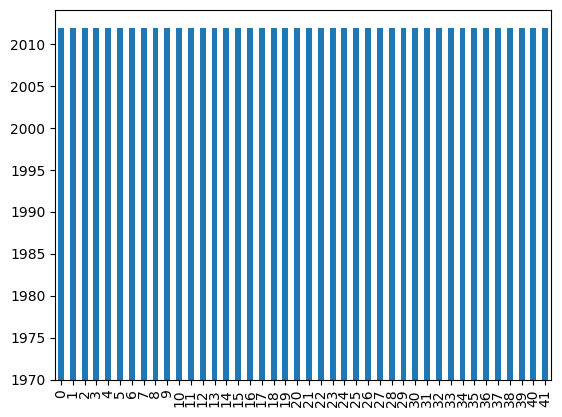

In [16]:
x[:42].plot(kind='bar')

In [17]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

<Axes: >

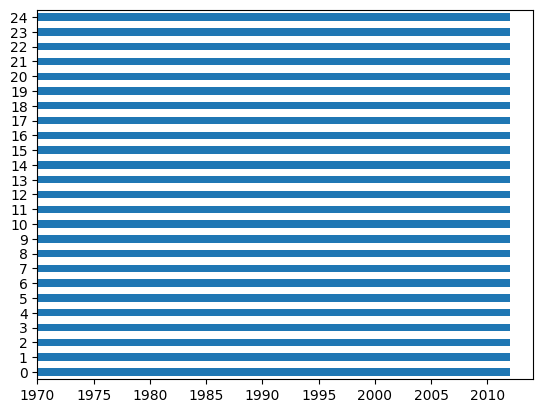

In [18]:
df['Timestamp'][:25].plot(kind='barh')

In [19]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0



**Calculating Price Change (Open-close)**


In [20]:
df=df.assign(Price_change=df['Close']-df['Open'])
df


,Timestamp,Open,High,Low,Close,Volume,Price_change
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000,0.0
...,...,...,...,...,...,...,...
6686276,2024-09-20 23:57:00,63157.00,63165.00,63157.00,63165.00,0.033024,8.0
6686277,2024-09-20 23:58:00,63165.00,63165.00,63165.00,63165.00,0.000000,0.0
6686278,2024-09-20 23:59:00,63200.00,63218.00,63200.00,63211.00,0.070520,11.0
6686279,2024-09-21 00:00:00,63211.00,63211.00,63211.00,63211.00,0.000000,0.0


In [21]:
df['Price_change']

,Price_change
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6686276,8.0
6686277,0.0
6686278,11.0
6686279,0.0


In [22]:
df.shape

(6686281, 7)

In [23]:
df



,Timestamp,Open,High,Low,Close,Volume,Price_change
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000,0.0
...,...,...,...,...,...,...,...
6686276,2024-09-20 23:57:00,63157.00,63165.00,63157.00,63165.00,0.033024,8.0
6686277,2024-09-20 23:58:00,63165.00,63165.00,63165.00,63165.00,0.000000,0.0
6686278,2024-09-20 23:59:00,63200.00,63218.00,63200.00,63211.00,0.070520,11.0
6686279,2024-09-21 00:00:00,63211.00,63211.00,63211.00,63211.00,0.000000,0.0


***Displaying the Rows where Close Price >> Open Price***

In [24]:
x=df['Close']
y=df['Open']
df=df[x<y]
df

,Timestamp,Open,High,Low,Close,Volume,Price_change
11499,2012-01-09 09:40:00,6.99,6.99,6.90,6.90,5.000000,-0.09
17794,2012-01-13 18:35:00,6.99,6.99,6.82,6.82,1.466276,-0.17
17825,2012-01-13 19:06:00,7.35,7.35,6.86,6.86,1.457726,-0.49
17845,2012-01-13 19:26:00,7.00,7.00,6.90,6.90,1.455604,-0.10
18488,2012-01-14 06:09:00,6.50,6.50,6.40,6.40,1.689531,-0.10
...,...,...,...,...,...,...,...
6686266,2024-09-20 23:47:00,63152.00,63152.00,63137.00,63137.00,0.012340,-15.00
6686267,2024-09-20 23:48:00,63136.00,63136.00,63098.00,63098.00,0.051906,-38.00
6686268,2024-09-20 23:49:00,63091.00,63091.00,63090.00,63090.00,0.001381,-1.00
6686271,2024-09-20 23:52:00,63122.00,63122.00,63118.00,63121.00,0.017124,-1.00


In [25]:
Price_trend=[]
for close,open in zip(df['Close'],df['Open']):
  if close>open:
    Price_trend.append('Up')
  elif close<open:
    Price_trend.append('Down')

In [26]:
df=df.assign(Price_trend=Price_trend)
df


,Timestamp,Open,High,Low,Close,Volume,Price_change,Price_trend
11499,2012-01-09 09:40:00,6.99,6.99,6.90,6.90,5.000000,-0.09,Down
17794,2012-01-13 18:35:00,6.99,6.99,6.82,6.82,1.466276,-0.17,Down
17825,2012-01-13 19:06:00,7.35,7.35,6.86,6.86,1.457726,-0.49,Down
17845,2012-01-13 19:26:00,7.00,7.00,6.90,6.90,1.455604,-0.10,Down
18488,2012-01-14 06:09:00,6.50,6.50,6.40,6.40,1.689531,-0.10,Down
...,...,...,...,...,...,...,...,...
6686266,2024-09-20 23:47:00,63152.00,63152.00,63137.00,63137.00,0.012340,-15.00,Down
6686267,2024-09-20 23:48:00,63136.00,63136.00,63098.00,63098.00,0.051906,-38.00,Down
6686268,2024-09-20 23:49:00,63091.00,63091.00,63090.00,63090.00,0.001381,-1.00,Down
6686271,2024-09-20 23:52:00,63122.00,63122.00,63118.00,63121.00,0.017124,-1.00,Down


**Time Series For CLOSE PRICE**

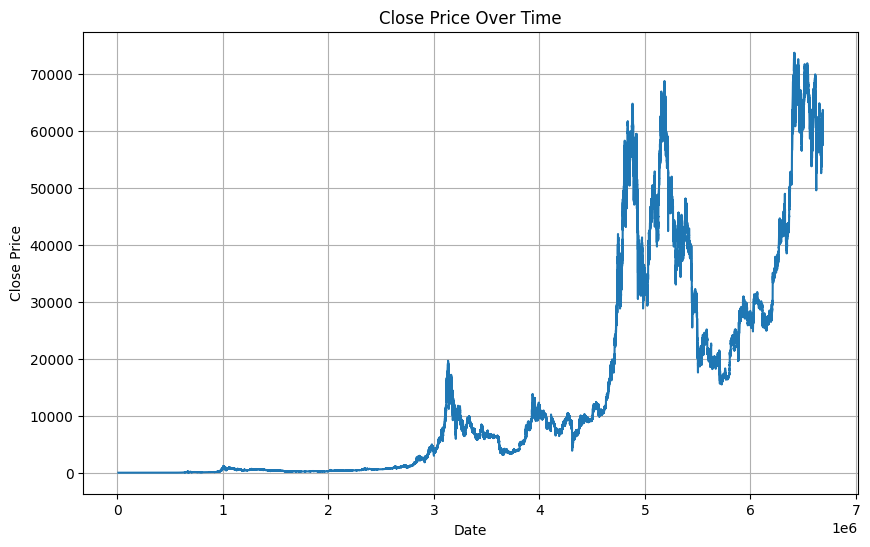

In [27]:
df['Close'].plot(figsize=(10,6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

***MEAN MEDIAN AND MODE ***

In [28]:
mean=np.mean(df['Close'])
median=np.median(df['Close'])
print(f"Mean:{mean}")
print(f"Median:{median}")


Mean:19553.60663335513
Median:10024.27


In [29]:
from scipy import stats

mode_open = stats.mode(df['Open'])
print(mode_open)

ModeResult(mode=580.0, count=157)


**STANDARD DEVIATION**

In [30]:
std_values = df[['Open', 'Close', 'Low', 'High']].std()
print(std_values)


Open     20075.228170
Close    20064.404367
Low      20060.931046
High     20077.919588
dtype: float64


**VARIANCE**

In [31]:

var_values = df[['Open', 'Close', 'Low', 'High']].var()
print(var_values)

Open     4.030148e+08
Close    4.025803e+08
Low      4.024410e+08
High     4.031229e+08
dtype: float64


**Distribution using Histogram for Volume Both average and trading**

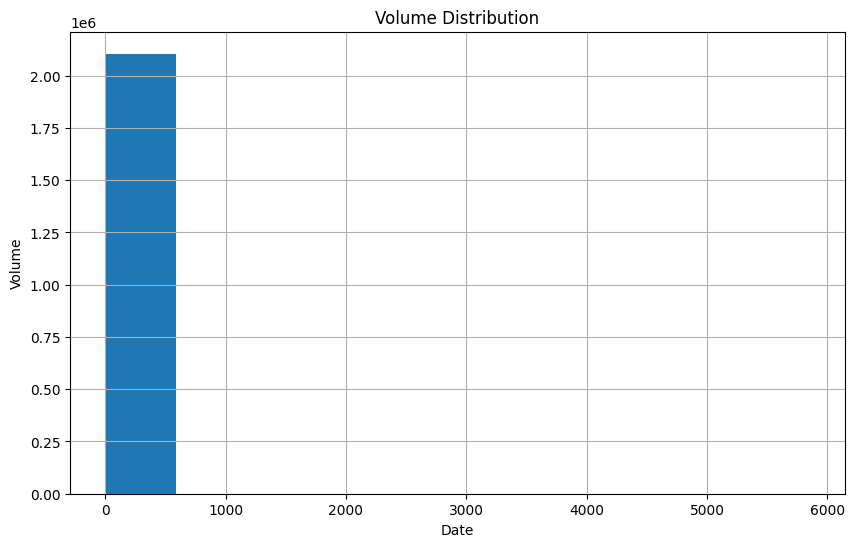

In [32]:
df['Volume'].hist(figsize=(10,6))
plt.title('Volume Distribution')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.grid(True)
plt.show()

**Pair Plot Between Open ,Close,High,low**

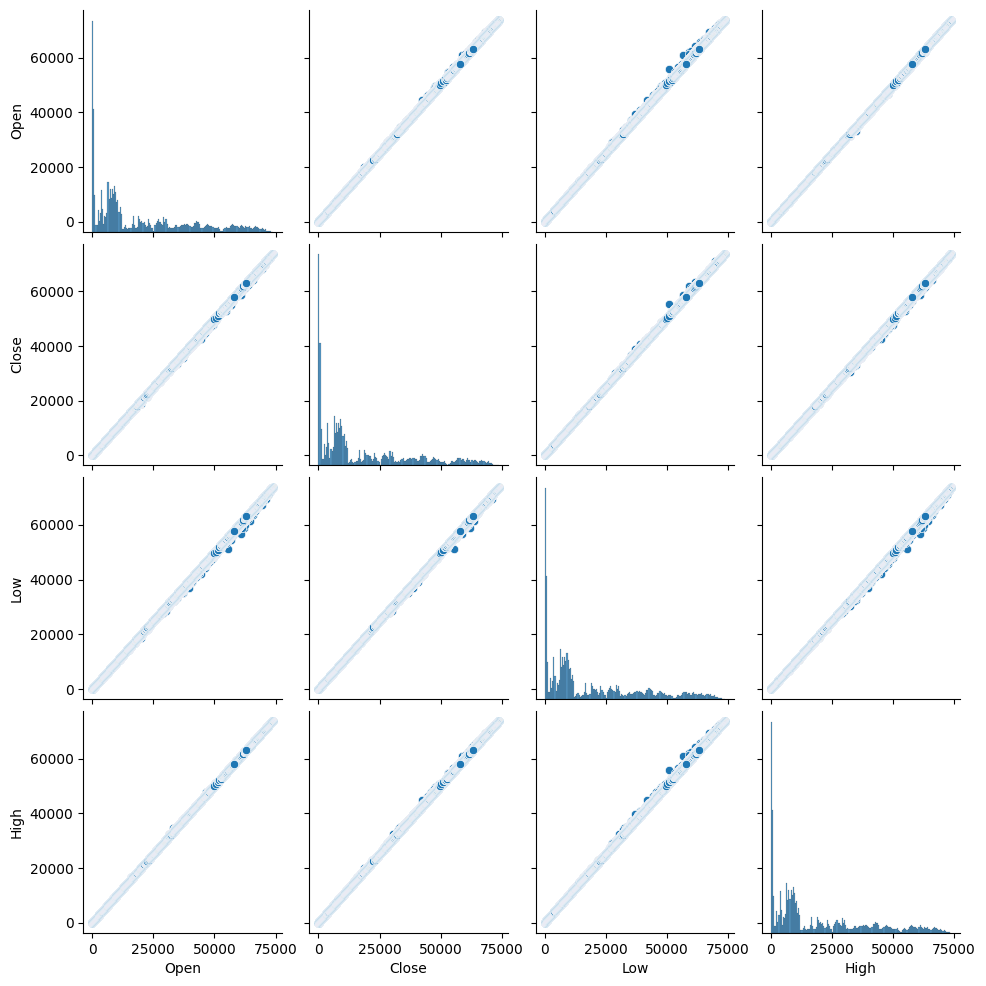

In [33]:
import seaborn as sns
sns.pairplot(df[['Open', 'Close', 'Low', 'High']], diag_kind='hist')
plt.show()

<Figure size 1000x800 with 0 Axes>

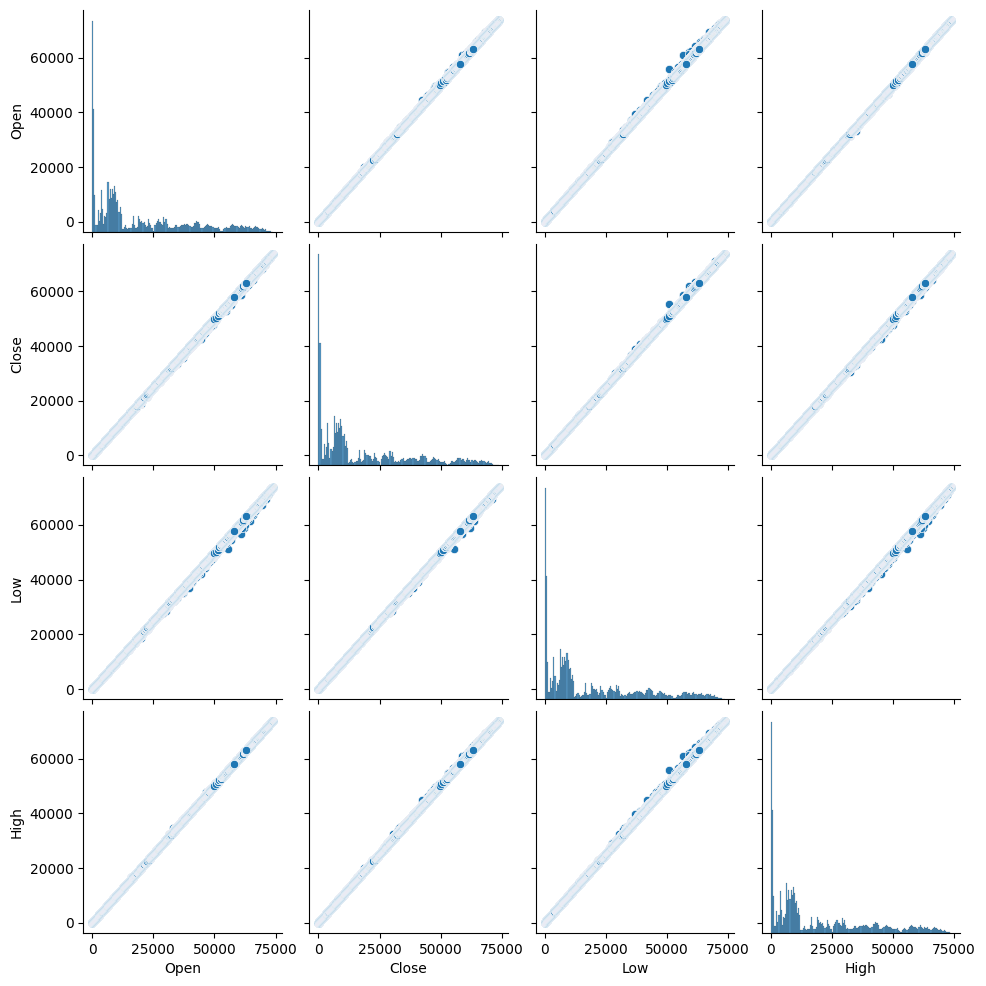

In [34]:

plt.figure(figsize=(10, 8))
sns.pairplot(df[['Open', 'Close', 'Low', 'High']], diag_kind='hist')
plt.show()

**CORRELATION MATRIX**

In [35]:
correlation_matrix = df[['Open', 'Close', 'Low', 'High']].corr()
print(correlation_matrix)

           Open     Close       Low      High
Open   1.000000  0.999999  0.999999  1.000000
Close  0.999999  1.000000  1.000000  0.999999
Low    0.999999  1.000000  1.000000  0.999999
High   1.000000  0.999999  0.999999  1.000000


In [36]:
sample_df=df.sample(n=35)

In [37]:
sample_df

,Timestamp,Open,High,Low,Close,Volume,Price_change,Price_trend
3861741,2019-05-06 11:22:00,5608.64,5608.97,5606.29,5608.29,0.431845,-0.35,Down
4353908,2020-04-12 07:09:00,6825.31,6825.31,6821.80,6821.80,0.040248,-3.51,Down
1312768,2014-07-01 03:29:00,639.38,640.00,636.06,636.06,1.227500,-3.32,Down
3834629,2019-04-17 15:30:00,5239.63,5239.63,5235.71,5237.12,0.288060,-2.51,Down
6114880,2023-08-18 07:41:00,26468.00,26468.00,26427.00,26431.00,7.802513,-37.00,Down
1547737,2014-12-11 08:38:00,341.90,342.45,341.88,341.88,10.429000,-0.02,Down
4978592,2021-06-20 03:33:00,35527.10,35543.18,35509.67,35509.67,2.401460,-17.43,Down
4024339,2019-08-27 09:20:00,10176.10,10183.77,10175.58,10175.58,5.629177,-0.52,Down
6288210,2023-12-16 17:31:00,42312.00,42313.00,42307.00,42307.00,0.076663,-5.00,Down
3451923,2018-07-25 20:04:00,8106.85,8106.85,8102.21,8104.89,35.078599,-1.96,Down


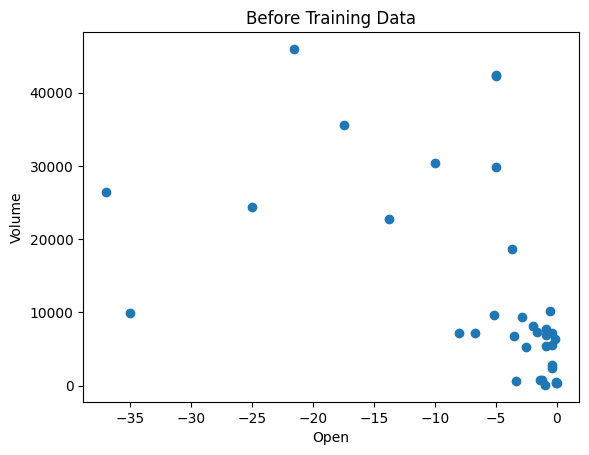

In [38]:
plt.scatter(sample_df['Price_change'],sample_df['Close'])
plt.title('Before Training Data')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

Predictive Modelling


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Choosing Open And Close For prediction of other Changes Parameter!!


In [40]:
X=sample_df[['Open','Close']]
y=sample_df['Volume']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [56]:
X_train


,Open,Close
2867796,2444.24,2443.88
6288210,42312.00,42307.00
3067657,6359.96,6359.85
3451923,8106.85,8104.89
2940936,2849.81,2849.46
3861741,5608.64,5608.29
6114880,26468.00,26431.00
3846232,5459.55,5458.67
4357571,6925.00,6924.14
1547737,341.90,341.88


In [57]:
y_train

,Volume
2867796,0.198440
6288210,0.076663
3067657,1.222759
3451923,35.078599
2940936,5.891478
3861741,0.431845
6114880,7.802513
3846232,6.772247
4357571,2.926500
1547737,10.429000


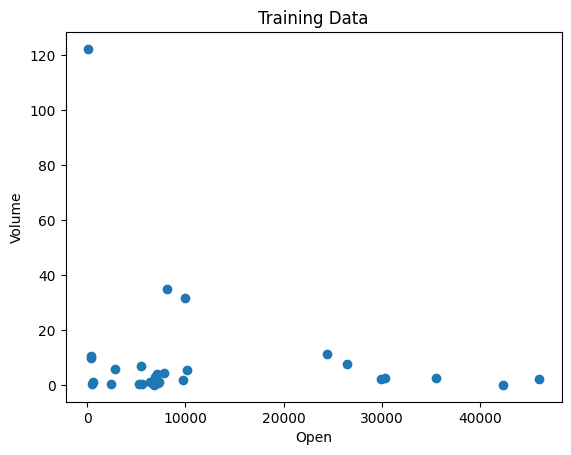

In [58]:
plt.scatter(X_train['Open'],y_train)
plt.title('Training Data')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

In [59]:
y_pred=LinReg.predict(X_test)

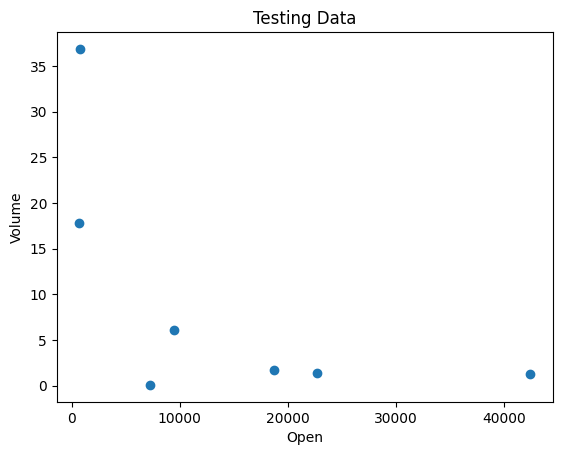

In [60]:
plt.scatter(X_test['Open'],y_test)
plt.title('Testing Data')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()

In [61]:
y_test

,Volume
998014,36.872351
4675450,1.745244
4152790,0.088950
6335824,1.296058
2351520,17.869388
4719218,1.361634
3980373,6.101593


Calculating Accuracy from Metrics


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [63]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [64]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 121.40078268565605
Mean Absolute Percentage Error (MAPE): 22.327658327688532


**Using DecisionTree MOdel**

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [66]:
Tree=DecisionTreeRegressor(max_depth=5, random_state=42)
Tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [67]:
y_pred1=Tree.predict(X_test)

In [68]:
y_pred1.mean()

3.688838662321429

In [69]:
mse1=mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}') #Same with Linear Models.....

Mean Squared Error: 121.40


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
sample_df[['Open', 'Close']] = scaler.fit_transform(sample_df[['Open', 'Close']])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Tree=DecisionTreeRegressor(max_depth=5, random_state=42)
Tree.fit(X_train, y_train)
mse1=mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}') #Same with Linear Models.....

Mean Squared Error: 121.40
